# Everyone's an `Artist`

This notebook is intended for the matplotlib user who is generally familiar with using the `pyplot` module but often ends up on StackOverflow looking for solutions to a specific graphical need. If you've ever found yourself writing lines like `fig, ax = plt.subplots(111)` or `ax.set_xlim(...)`, but are unclear exactly why those solutions worked, this is for you. 

We'll start by creating the same figure from the first notebook with the object-oriented `matplotlib` interface. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

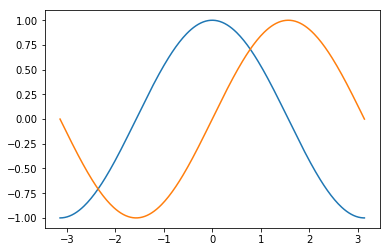

In [2]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C,S = np.cos(X), np.sin(X)

fig, ax = plt.subplots()
ax.plot(X,C)
ax.plot(X,S)

# an alternate way of initializing a figure is to create an instance of Figure and then of Axes
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.plot(X,C)
# ax.plot(X,S)

### What happened here?

After declaring the vectors containing our data, we created several `Artists` that represent different components of the matplotlib figure. The `Figure` object is the canvas that contains all components of the figure including plot axes, legends, titles, annotations etc. The `Axes` object contains each plot axis, the data points, ticks etc. These objects are arranged in a hierarchical structure of special `Artists` called containers. We can explore this hierarchy by examining these objects

Figure(432x288)
Figure(432x288)
XAxis(54.000000,36.000000)
YAxis(54.000000,36.000000)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Figure(432x288)
Figure(432x288)


AttributeError: 'Figure' object has no attribute 'xaxis'

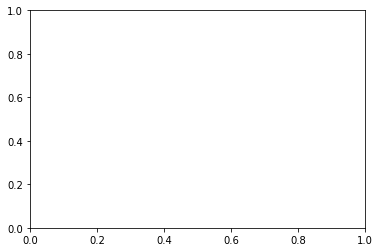

In [3]:
# Create an instance of Figure
fig = plt.figure()
# Create an Axes object. 
# The (1,1,1) arguments tell matplotlib that there will be a grid of 1x1 subplots 
# and we'll work with the first subplot
ax = fig.add_subplot(1,1,1)

# fig is an instance of Figure
print(fig)
# fig contains an AxesSubplot object
print(fig.axes)
# ax knows the Figure instance it belongs to
print(ax.figure)
# ax contains one XAxis object and one YAxis object
print(ax.xaxis)
print(ax.yaxis)
# the XAxis and YAxis objects know which Axes and Figures they belong to
print(ax.xaxis.axes)
print(ax.yaxis.axes)
print(ax.xaxis.figure)
print(ax.yaxis.figure)
# an instance of a Figure object can have multiple XAxis objects contained in them, so this line will produce an error
print(fig.xaxis)

### Two kinds of `Artist`s

The `Artist` objects created in the cell above all belong to a type of `Artist` called containers. The name is pretty self-explanatory, these `Artist` objects contain the important information in your plot. 

The other category of `Artist` objects are primitives. The `Line2D` object created in cell 2 is an example of a primitive. There are primitives corresponding to images, shapes, paths, and text (to name a few). 

You can read more about how to inspect the different `Figure` and `Axes` attributes in the [Artist Tutorial](https://matplotlib.org/tutorials/intermediate/artists.html) on the matplotlib website.

### Helper methods get the job done

Helper methods are functions that simplify the process of creating primitives within container `Artist`s. In the first example, we use the helper method `ax.plot` to create the `Line2D` object. We can assign a `line.Line2D` to a variable to accomplish the same thing. However, it's much more convenient to use the helper method because it simplifies the process of transforming the data to display coordinates

[]


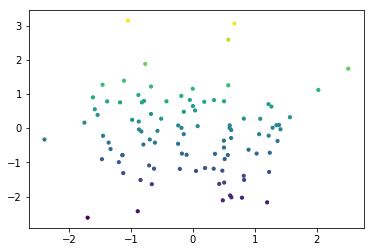

In [15]:
x = np.random.randn(100)
y = np.random.randn(100)

fig = plt.figure()
ax = fig.add_subplot(111)
print(fig.axes)
print(ax.collections)
ax.scatter(x,y, s=10, c=y)
print(ax.collections)

### The values of figure attributes can be changed with `set_***` methods

These `set_***` methods are most frequently applied to changes to figure axes, axis ticks, and axis labels. Methods like `set_xlim` and `set_ylim` alter the axis limits, `set_xlabel` and `set_ylabel` modify the axis labels, etc. However, it should be noted that these methods are static, and the plot won't automatically update changes to the plot regarding the specific `set_***` method used. 

There are object formatters that can do this for you. The `Ticker` object does this for ticks on each axis. You can read more about formatting objects [here](https://matplotlib.org/tutorials/intermediate/artists.html).

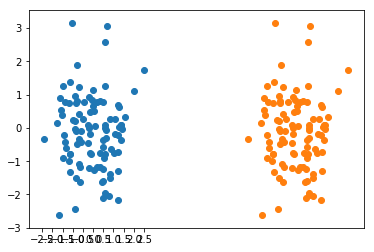

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
scatter1 = ax.scatter(x, y, label='')
#setting the x ticks from -2.5 to 2.5 with 0.5 increments
ax.set_xticks([-2.5,-2.0,-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2.0,2.5])
scatter2 = ax.scatter(x+10,y, label='') 

In [22]:
#let's look at the tick formatters and locators
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_major_locator())
print(ax.yaxis.get_major_formatter())
print(ax.yaxis.get_major_locator())

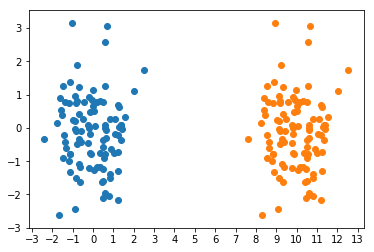

In [23]:
import matplotlib.ticker as ticker # this is required to used `Ticker`
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # set tick interval to 1
fig

## Exercise

Create a single plot with two y-axes ([Hint](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.twinx.html)).